### Задание №2

Цель: настройка параметров методов обучения (оптимизаторов) и снижение эффекта переобучения

1. Попробовать с помощью нейронных сетей решить задачу регрессии (хотя можно и с классификацией продолжить)
> 1.1 Для этого найдите набор данных для задачи регрессии (по признакам предсказываем некоторую числовую характристику, а не класс)

2. При описании слоев используйте объекты, реализующие активационные функции (from keras.activations ), объекты методов обучения (from keras.optimizers import Adam, SGD, ...) и функции потерь (from keras.losses import ...)

3. Попробуйте поменять параметры методов обучения.

4. Добейтесь эффекта переобучения модели (например, добавьте слоев и нейронов, увеличьте количество эпох обучения)

5. С помощью слоев прореживания (Dropout) и методов регуляризации добейтесь снижения эффекта переобучения

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import L1, L2
from keras.activations import relu, linear

In [3]:
# Датасет с кагла про качество красного вина
df = pd.read_csv("winequality-red.csv")
df.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#Посмотрим на описательную статистику для всех численных признаков
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Разделение на признаки и целевую переменную
data = df.drop('quality', axis=1).values 
target = df['quality'].values  

In [6]:
#Создание экземпляра MinMaxScaler
scaler = MinMaxScaler()

#Нормализация признаков
x_scaled = scaler.fit_transform(data)

#Нормализация целевой переменной
y_scaled = scaler.fit_transform(target.reshape(-1, 1))

#Разбивка на обучающий и тестовый наборы данных
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, train_size=0.75, random_state=42)

In [7]:
model = Sequential([
    Dense(units=100, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dense(units=1, activation='linear')
])

model.compile(optimizer = "adam", loss = "mse")

model.fit(x_train, y_train, batch_size = 10, epochs = 200)

model.evaluate(x_test, y_test)

yPred = model.predict(x_test ).reshape(-1,)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.1059 
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0194
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.0186
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0178
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0154
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0160
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0173
Epoch 8/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.0161
Epoch 9/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0177
Epoch 10/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.0160
Epoch 11/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.0161
Epoch 12/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.0170
Epoch 13/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.0159
Epoch 14/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.0153
Epoch 15/200
120/120 ━━━━━

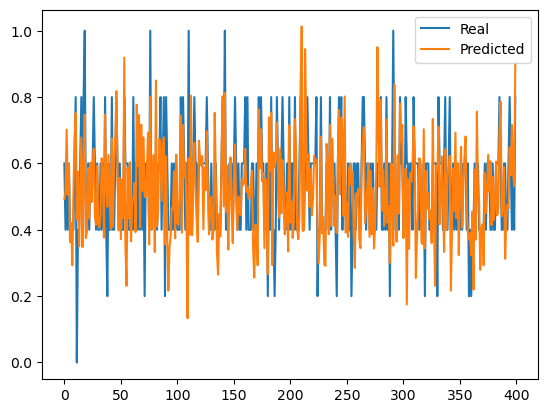

In [8]:
plt.plot(y_test, label = "Real" )
plt.plot(yPred, label = "Predicted")
plt.legend()
plt.show()

In [9]:
#Создание модели с использованием Dropout и L2-регуляризации (Штраф за большие веса)
model = Sequential([
    Dense(units=100, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=L2(0.01)),
    Dropout(0.1),  #Слой Dropout с вероятностью 10%
    Dense(units=50, activation='relu'),
    Dense(units=30, activation='relu'),
    Dropout(0.1),  #Слой Dropout с вероятностью 10%
    Dense(units=1, activation='linear')
])

#Компиляция модели
model.compile(optimizer="adam", loss="mse")

model.fit(x_train, y_train, batch_size = 10, epochs = 200)

model.evaluate(x_test, y_test)

yPred = model.predict(x_test ).reshape(-1,)

Epoch 1/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.2544
Epoch 2/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.0752
Epoch 3/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.0387
Epoch 4/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.0296
Epoch 5/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.0261
Epoch 6/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0216
Epoch 7/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.0231
Epoch 8/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.0218
Epoch 9/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.0218
Epoch 10/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.0227
Epoch 11/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.0207
Epoch 12/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.0214
Epoch 13/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0219
Epoch 14/200
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 0.0218
Epoch 15/200
12

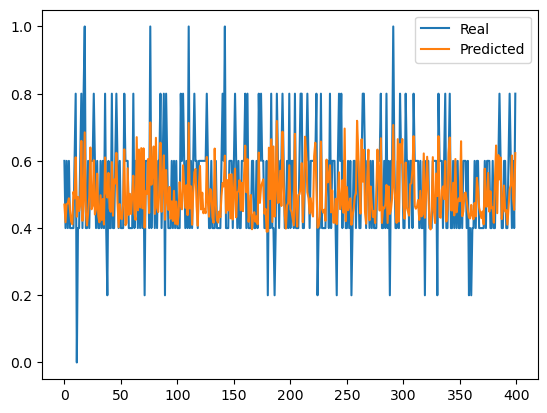

In [10]:
plt.plot(y_test, label = "Real" )
plt.plot(yPred, label = "Predicted")
plt.legend()
plt.show()